<h1 style="color:blue;">Problem statement</h1>

Using Exploratory Data Analysis (EDA) for basic understanding the risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

1. ## Data sourcing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv("loan/loan.csv")
loan_data.head()

C:\Users\sbondugula\AppData\Local\Temp\ipykernel_50432\296403435.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(39717, 111)

2. ## Data cleaning

### Fix missing values

In [5]:
loan_data.isna().sum()[loan_data.isna().sum()>0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

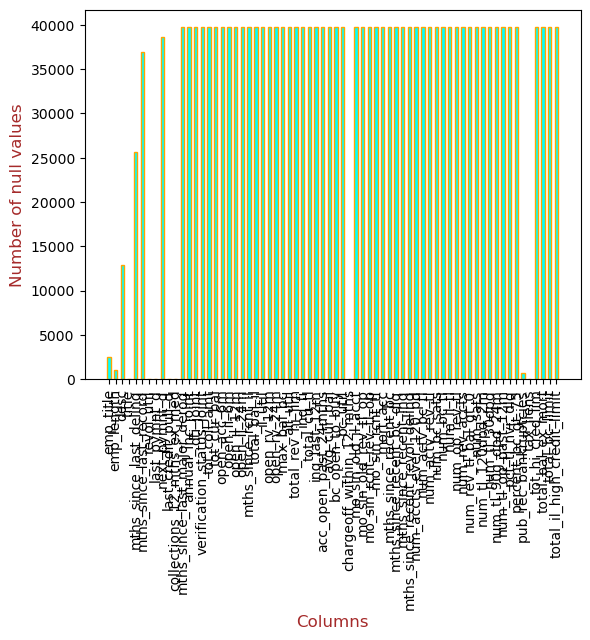

In [6]:
plt.bar(loan_data.isna().sum()[loan_data.isna().sum()>0].index,loan_data.isna().sum()[loan_data.isna().sum()>0].values,width=0.5, align='center', edgecolor='Orange',color='cyan')
plt.xlabel("Columns", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of null values", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=90)
plt.show()

In [7]:
loan_data.isna().sum()[loan_data.isna().sum()>0].count()

68

It is observed that there are 68 columns which have atleast a missing value and also some columns have almost all null values.
From the above bar graph, we can see most of the columns have atleast 10000 missing values out of 39717 rows(which is almost 25 %).Let us make a cutoff of 10000 and delete all the columns which have more than 10000 null values/missing values.For remaining columns, we can analyse further if we can clean them or not.

In [8]:
loan_data.isna().sum()[loan_data.isna().sum()>10000].index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [9]:
loan_data.drop(columns=loan_data.isna().sum()[loan_data.isna().sum()>10000].index,inplace=True)

In [10]:
loan_data.shape

(39717, 53)

In [11]:
loan_data.isna().sum()[loan_data.isna().sum()>0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

Let us analyze the columns which have missing values

In [12]:
loan_data[loan_data.isna().sum()[loan_data.isna().sum()>0].index]

,emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Computer,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,bike,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,real estate business,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,personel,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Personal,53.90%,May-16,May-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Home Improvement,13.10%,Jul-10,Jun-10,NaN,NaN,NaN,NaN
39713,"Squarewave Solutions, Ltd.",3 years,Retiring credit card debt,26.90%,Jul-10,Jul-10,NaN,NaN,NaN,NaN
39714,NaN,< 1 year,MBA Loan Consolidation,19.40%,Apr-08,Jun-07,NaN,NaN,NaN,NaN
39715,NaN,< 1 year,JAL Loan,0.70%,Jan-08,Jun-07,NaN,NaN,NaN,NaN


Let us analyze the number of unique values in each of the above columns

In [13]:
loan_data[loan_data.isna().sum()[loan_data.isna().sum()>0].index].nunique()

emp_title                     28820
emp_length                       11
title                         19615
revol_util                     1089
last_pymnt_d                    101
last_credit_pull_d              106
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

emp_title and title columns have more unique values which does not have any impact on analysis. Let us remove them.

In [14]:
loan_data.drop(columns=["emp_title","title"],inplace=True)

In [15]:
loan_data.shape

(39717, 51)

Some columns have only one unique value. They cannot be used for any analysis. Let us remove them.

In [16]:
loan_data.drop(columns=loan_data.nunique()[loan_data.nunique()==1].index,inplace=True)

In [17]:
loan_data.shape

(39717, 42)

In [18]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [19]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

From the above columns - total_rec_int, total_rec_prncp, total_rec_late_fee, last_credit_pull_d, recoveries, collection_recovery_fee, last_pymnt_d,out_prncp,out_prncp_inv  are the features of post loan approval, which may not need for us to analyse loan approval.

In [20]:
loan_data.drop(columns=['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp','out_prncp_inv'],inplace=True)

In [21]:
loan_data.shape

(39717, 33)

In [22]:
loan_data.nunique()

id                      39717
member_id               39717
loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
url                     39717
purpose                    14
zip_code                  823
addr_state                 50
dti                      2868
delinq_2yrs                11
earliest_cr_line          526
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_bal               21711
revol_util               1089
total_acc                  82
total_pymnt             37850
total_pymnt_inv         37518
last_pymnt_amnt         34930
pub_rec_bankruptcies        3
dtype: int

As we can see, id,member_id and url are unique for each borrower. So we can drop those columns as they are not needed for further analysis

In [23]:
loan_data.drop(columns=["id","member_id","url"],inplace=True)

In [24]:
loan_data.nunique()

loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
purpose                    14
zip_code                  823
addr_state                 50
dti                      2868
delinq_2yrs                11
earliest_cr_line          526
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_bal               21711
revol_util               1089
total_acc                  82
total_pymnt             37850
total_pymnt_inv         37518
last_pymnt_amnt         34930
pub_rec_bankruptcies        3
dtype: int64

In [25]:
loan_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

Now we have only three columns which have missing values. Let us now find what percent of rows, these columns have missing values. If the percentage is less, we can delete those rows. 

In [26]:
percent_of_missing_values = 100*loan_data.isna().sum()/len(loan_data)
percent_of_missing_values[100*loan_data.isna().sum()/len(loan_data)>0]

emp_length              2.706650
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64

As we can clearly see the percentage is less than 3, we can delete those rows with missing values.

In [27]:
loan_data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'],axis=0, inplace=True)

In [28]:
loan_data.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
dtype: int64

Now we have removed the missing / NAN values from the data

In [29]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0,15,0,27783,53.90%,38,3513.330000,3513.33,67.79,0.0


In [30]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

The column loan_status has three values (Fully Paid, Charged Off, Current). Here we cannot analyse whether the applicant is likely to default or not based on the Current status. So we can remove the rows with status is 'Current'

In [31]:
loan_data=loan_data[loan_data.loan_status!='Current']
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,3,9,0,7963,28.30%,12,5632.210000,5632.21,161.03,0.0


In [32]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Standardise values

Let us check the datatypes of the columns

In [33]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt           36800 non-null  int64  
 2   funded_amnt_inv       36800 non-null  float64
 3   term                  36800 non-null  object 
 4   int_rate              36800 non-null  object 
 5   installment           36800 non-null  float64
 6   grade                 36800 non-null  object 
 7   sub_grade             36800 non-null  object 
 8   emp_length            36800 non-null  object 
 9   home_ownership        36800 non-null  object 
 10  annual_inc            36800 non-null  float64
 11  verification_status   36800 non-null  object 
 12  issue_d               36800 non-null  object 
 13  loan_status           36800 non-null  object 
 14  purpose               36800 non-null  object 
 15  zip_code           

In [34]:
loan_data.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '15.99%', '16.49%',
       '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '8.49%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '16.59%', '17.19%',
       '12.87%', '20.69%', '9.67%', '21.82%', '19.79%', '18.49%',
       '13.84%', '

As we can see above, the int_rate column is in the form of object appended with '%', we can remove it and convert to float, so that it can be used for our analysis

In [35]:
loan_data.int_rate=loan_data.int_rate.apply(lambda x:float(str(x).rstrip('%')))

In [36]:
loan_data.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49,  7.9 , 18.64, 21.28, 12.69, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 20.89, 20.3 ,
       23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11,  6.  , 23.52,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  5.42,  8.49, 10.59, 17.49,
       15.62, 19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69,
       20.62, 20.25, 21.36, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49,
       13.84, 22.94, 24.4 , 21.48, 14.82,  7.29, 17.88, 20.11, 16.02,
       13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11, 10.37, 14.17,
       16.4 , 17.51,  7.66, 10.74,  5.79,  6.92, 10.  ,  9.63, 14.54,
       12.68, 18.62, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74,
       20.48,  6.91,

int_rate is now standardized to float for statistical computation.

In [37]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   funded_amnt           36800 non-null  int64  
 2   funded_amnt_inv       36800 non-null  float64
 3   term                  36800 non-null  object 
 4   int_rate              36800 non-null  float64
 5   installment           36800 non-null  float64
 6   grade                 36800 non-null  object 
 7   sub_grade             36800 non-null  object 
 8   emp_length            36800 non-null  object 
 9   home_ownership        36800 non-null  object 
 10  annual_inc            36800 non-null  float64
 11  verification_status   36800 non-null  object 
 12  issue_d               36800 non-null  object 
 13  loan_status           36800 non-null  object 
 14  purpose               36800 non-null  object 
 15  zip_code           

In [38]:
loan_data.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Aug-07'], dtype=object)

As we can see above, the column "issue_d" which is the combination of month and date can be split into two separate columns for month and year.
And the original column can be removed.

In [39]:
month_num_dict = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

loan_data['issue_id_month']=loan_data.issue_d.apply(lambda x:str(x).split('-')[0])
loan_data['issue_id_year']=loan_data.issue_d.apply(lambda x:int(str(x).split('-')[1]))
loan_data['issue_id_month_number']=loan_data.issue_id_month.apply(lambda x : month_num_dict[x])

In [40]:
loan_data.drop(columns=["issue_d"],inplace=True)

In [41]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              36800 non-null  int64  
 1   funded_amnt            36800 non-null  int64  
 2   funded_amnt_inv        36800 non-null  float64
 3   term                   36800 non-null  object 
 4   int_rate               36800 non-null  float64
 5   installment            36800 non-null  float64
 6   grade                  36800 non-null  object 
 7   sub_grade              36800 non-null  object 
 8   emp_length             36800 non-null  object 
 9   home_ownership         36800 non-null  object 
 10  annual_inc             36800 non-null  float64
 11  verification_status    36800 non-null  object 
 12  loan_status            36800 non-null  object 
 13  purpose                36800 non-null  object 
 14  zip_code               36800 non-null  object 
 15  ad

In [42]:
loan_data.earliest_cr_line.unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Nov-04', 'Jul-05',
       'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89', 'Jul-03',
       'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03', 'Jan-01',
       'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01', 'Feb-02',
       'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Apr-05', 'Oct-07',
       'Dec-00', 'Apr-07', 'Jan-03', 'Mar-94', 'Sep-98', 'Jun-04',
       'Nov-95', 'Jul-99', 'Jun-95', 'Sep-92', 'Jan-02', 'Apr-92',
       'Oct-06', 'May-00', 'Dec-98', 'Dec-04', 'Oct-00', 'May-02',
       'May-06', 'Jul-02', 'Jul-06', 'May-97', 'Oct-05', 'Apr-95',
       'Oct-02', 'Jan-00', 'Apr-00', 'Dec-94', 'Sep-05', 'Dec-84',
       'Dec-99', 'Nov-03', 'Jun-89', 'Jun-03', 'Oct-96', 'May-03',
       'Jun-02', 'Jun-07', 'Dec-96', 'Sep-02', 'Jan-86', 'May-98',
       'Jan-97', 'Jun-05', 'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94',
       'Jun-92', 'Mar-97', 'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00',
       'Feb-01', 'Dec-88', 'Feb-99', 'Dec-91', 'Aug-00', 'Oct-

As we can see above, the column "earliest_cr_line" which is the combination of month and year can be split into two separate columns for date and month.
And the original column can be removed.

In [43]:
loan_data['earliest_cr_line_month']=loan_data.earliest_cr_line.apply(lambda x:str(x).split('-')[0])
loan_data['earliest_cr_line_year']=loan_data.earliest_cr_line.apply(lambda x:int(str(x).split('-')[1]))

In [44]:
loan_data.drop(columns=["earliest_cr_line"],inplace=True)

In [45]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36800 non-null  int64  
 1   funded_amnt             36800 non-null  int64  
 2   funded_amnt_inv         36800 non-null  float64
 3   term                    36800 non-null  object 
 4   int_rate                36800 non-null  float64
 5   installment             36800 non-null  float64
 6   grade                   36800 non-null  object 
 7   sub_grade               36800 non-null  object 
 8   emp_length              36800 non-null  object 
 9   home_ownership          36800 non-null  object 
 10  annual_inc              36800 non-null  float64
 11  verification_status     36800 non-null  object 
 12  loan_status             36800 non-null  object 
 13  purpose                 36800 non-null  object 
 14  zip_code                36800 non-null

In [46]:
loan_data.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

As we can see above, the revol_util column is in the form of object appended with '%', we can remove it and convert to float, so that it can be used for our analysis

In [47]:
loan_data.revol_util=loan_data.revol_util.apply(lambda x:float(str(x).rstrip('%')))

In [48]:
loan_data.revol_util.unique()

array([8.370e+01, 9.400e+00, 9.850e+01, ..., 4.963e+01, 4.000e-02,
       7.280e+00])

In [49]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

As we see above, emp_length does not contain data in numeric format, we can convert it to numeric format so that it can be helpful for us in further analysis.

In [50]:
import re
loan_data.emp_length=loan_data.emp_length.apply(lambda x:str(x).replace("< 1 year","0"))
loan_data.emp_length=loan_data.emp_length.apply(lambda x:int(re.findall(r'\d+', str(x))[0]))

In [51]:
loan_data.emp_length.unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

Let us now detect outliers.
Let us consider loan_amnt first.

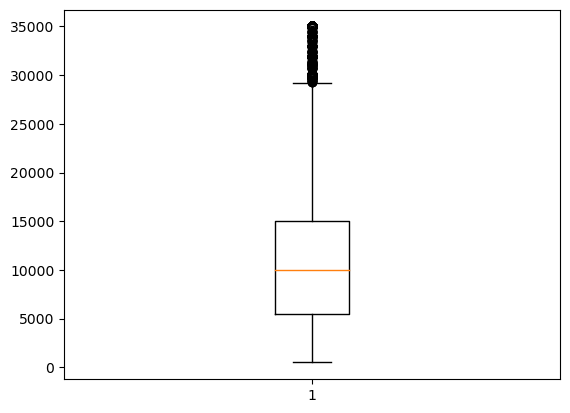

In [52]:
plt.boxplot(loan_data.loan_amnt)
plt.show()

From the above boxplot, we can see there are some outliers above 30000. Let us remove them.

In [53]:
loan_data=loan_data[loan_data.loan_amnt<30000]

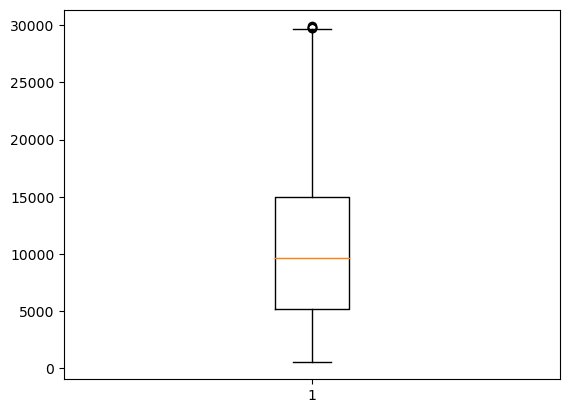

In [54]:
plt.boxplot(loan_data.loan_amnt)
plt.show()

As we can see outliers are removed.

Let us consider int_rate

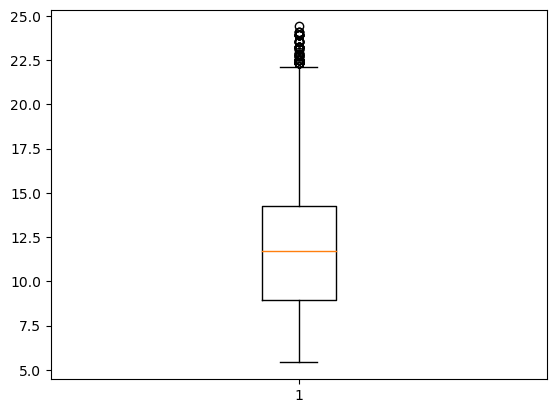

In [55]:
plt.boxplot(loan_data.int_rate)
plt.show()

From the above boxplot, we can see there are outliers. Let us remove them.

In [56]:
loan_data=loan_data[loan_data.int_rate<22.5]

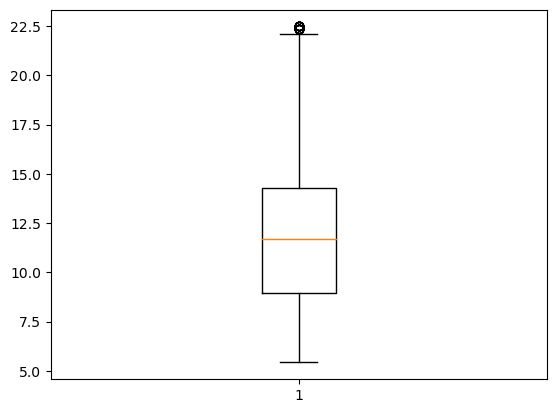

In [57]:
plt.boxplot(loan_data.int_rate)
plt.show()

We can see the outliers are removed now for int_rate.

Let us consider annual_inc

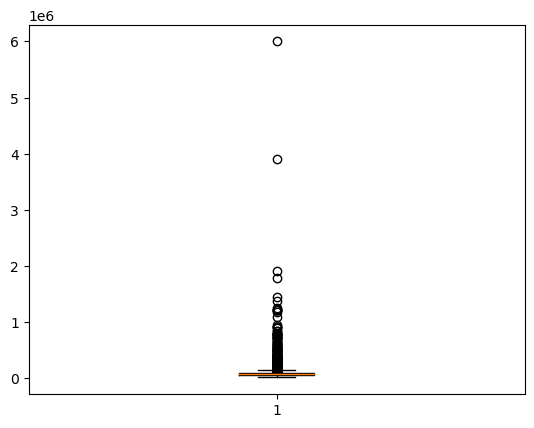

In [58]:
plt.boxplot(loan_data.annual_inc)
plt.show()

As we can clearly see there are outliers, let us remove outliers now.

In [59]:
loan_data = loan_data[loan_data.annual_inc<150000]

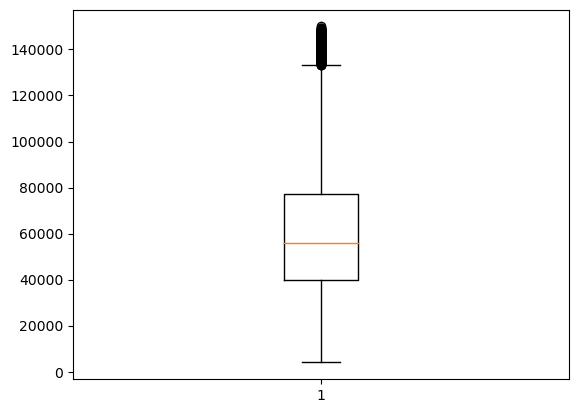

In [60]:
plt.boxplot(loan_data.annual_inc)
plt.show()

As we can see from the above boxplot, the outliers are removed.

In [61]:
pd.set_option('display.max_columns', None)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_id_month,issue_id_year,issue_id_month_number,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,Dec,11,12,Jan,85
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,Dec,11,12,Apr,99
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,Dec,11,12,Nov,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,Dec,11,12,Feb,96
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20,0,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,Dec,11,12,Nov,4


In [62]:
loan_data.shape

(34295, 33)

3. ## Univariate Analysis

First, let us conduct univariate analysis on unordered categorical variables

Let us analyse home_ownership column

In [63]:
ua_ucv_home_ownership = loan_data.groupby(by="home_ownership").size()

In [64]:
ua_ucv_home_ownership.sort_values(ascending=False,inplace=True)

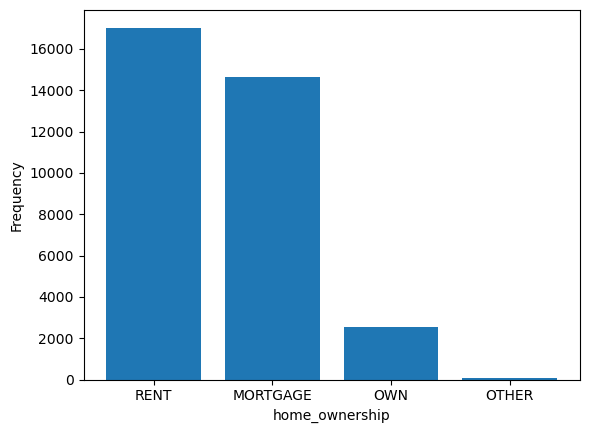

In [65]:
plt.bar(ua_ucv_home_ownership.index,ua_ucv_home_ownership.values)
plt.ylabel("Frequency")
plt.xlabel("home_ownership")
plt.show()

From the above scatter plot, we can analyse the loan applicants are more for home_ownership of "RENT" and "MORTGAGE"

Let the now analyse the another unordered categorical variable - purpose

In [66]:
ua_ucv_purpose = loan_data.groupby(by="purpose").size()

In [67]:
ua_ucv_purpose.sort_values(ascending=False,inplace=True)

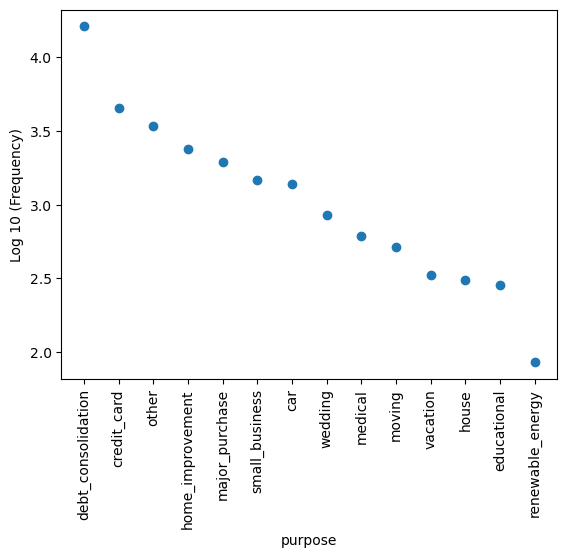

In [68]:
plt.scatter(ua_ucv_purpose.index,np.log10(ua_ucv_purpose.values))
plt.ylabel("Log 10 (Frequency)")
plt.xlabel("purpose")
plt.xticks(rotation=90)
plt.show()

We can see the "purpose" column follows "power law distribution".
We can see the loan applicants are more for purpose "debt_consolidation" followed by "credit_card" and "other"

In [69]:
ua_ucv_zip_code = loan_data.groupby(by="zip_code").size()

In [70]:
ua_ucv_zip_code.sort_values(ascending=False,inplace=True)

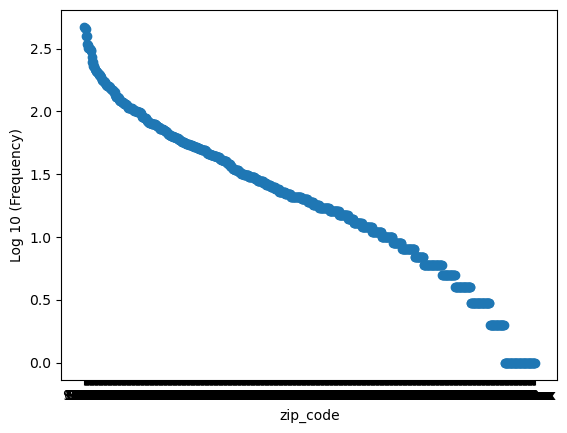

In [71]:
plt.scatter(ua_ucv_zip_code.index,np.log10(ua_ucv_zip_code.values))
plt.ylabel("Log 10 (Frequency)")
plt.xlabel("zip_code")

plt.show()

The above plot says zip_code also follows "power law distribution".
Let us plot it by not considering the minimum frequency ones.

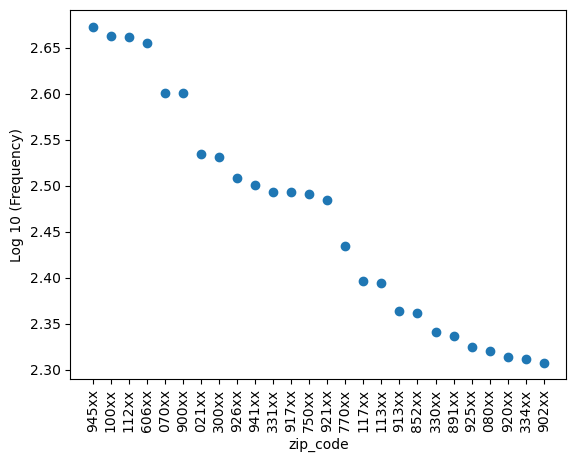

In [72]:
ua_ucv_zip_code = ua_ucv_zip_code[ua_ucv_zip_code>200]
ua_ucv_zip_code.sort_values(ascending=False,inplace=True)
plt.scatter(ua_ucv_zip_code.index,np.log10(ua_ucv_zip_code.values))
plt.ylabel("Log 10 (Frequency)")
plt.xlabel("zip_code")
plt.xticks(rotation=90)
plt.show()

From the above graph we can conclude, the loan applicants are high from zip_code starting with 100,945,112 and 606.

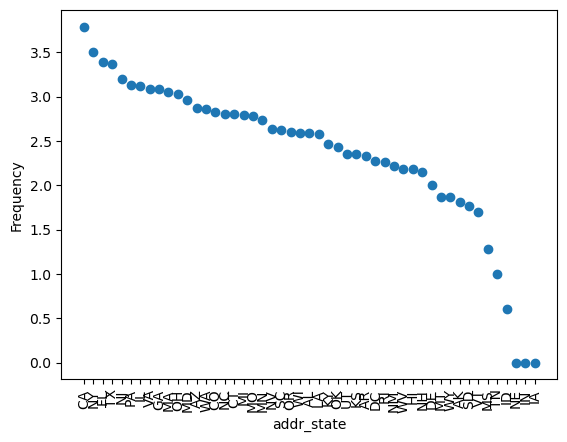

In [73]:
ua_ucv_addr_state = loan_data.groupby(by="addr_state").size()
ua_ucv_addr_state.sort_values(ascending=False,inplace=True)
plt.scatter(ua_ucv_addr_state.index,np.log10(ua_ucv_addr_state.values))
plt.ylabel("Frequency")
plt.xlabel("addr_state")
plt.xticks(rotation=90)
plt.show()

We can see the "addr_state" column follows "power law distribution".
We can see the loan applicants are more for addr_state "CA" followed by "NY" and "FL"

let us conduct univariate analysis on ordered categorical variables

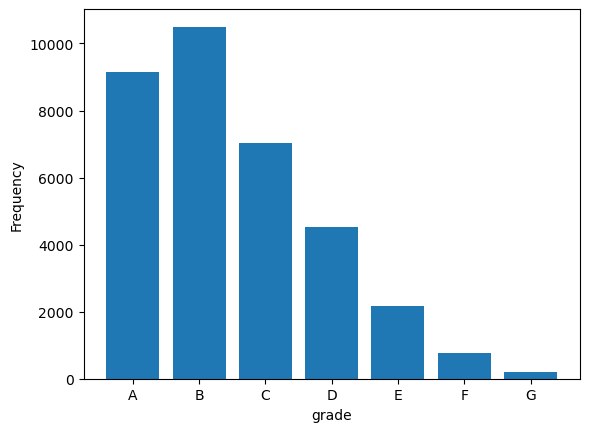

In [74]:
ua_ocv_grade = loan_data.groupby(by="grade").size()
plt.bar(ua_ocv_grade.index,ua_ocv_grade.values)
plt.ylabel("Frequency")
plt.xlabel("grade")
plt.show()

From the above plot, we can conclude most of the loan applicants are of grades A and B.
Also, there are very few applicants with grade G.
Also we can observe as the grade increases, the frequency of loan applicants decreasing.

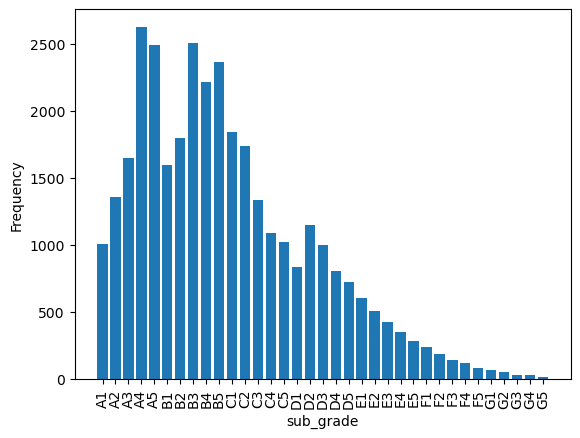

In [75]:
ua_ocv_sub_grade = loan_data.groupby(by="sub_grade").size()
plt.bar(ua_ocv_sub_grade.index,ua_ocv_sub_grade.values)
plt.ylabel("Frequency")
plt.xlabel("sub_grade")
plt.xticks(rotation=90)
plt.show()

From the above plot, we can conclude most of the loan applicants are of sub_grades belonging to A and B.
Also, there are very few applicants with sub_grade belonging to G.

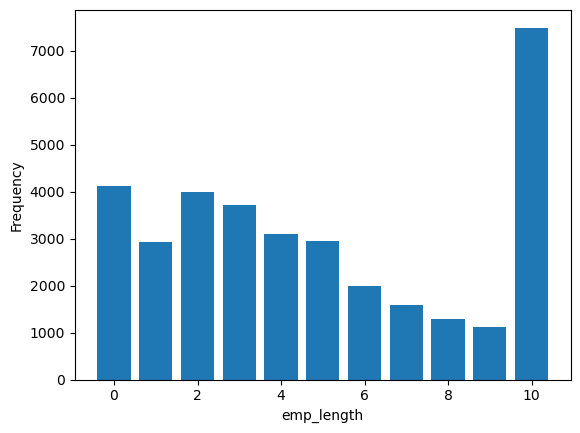

In [76]:
ua_ocv_emp_length = loan_data.groupby(by="emp_length").size()
ua_ocv_emp_length.sort_index()
plt.bar(ua_ocv_emp_length.index,ua_ocv_emp_length.values)
plt.ylabel("Frequency")
plt.xlabel("emp_length")
plt.show()

From the above plot, we can see the loan applicants are more for 10+ years of emp_length. 

[]

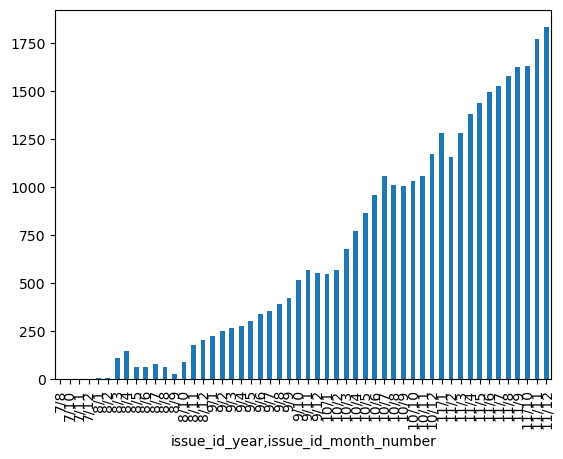

In [77]:
ua_ocv_issue_d = loan_data.groupby(by=['issue_id_year',"issue_id_month_number"]).size()
ax=ua_ocv_issue_d.plot.bar()
ax.set_xticklabels([f"{x}/{y}" for x,y in ua_ocv_issue_d.index.tolist()])
ax.plot()

From the above plot, we can see the number of loan applications has been increasing over the time.

let us conduct univariate analysis on quantitative variables

Let us analyse "loan_amnt"

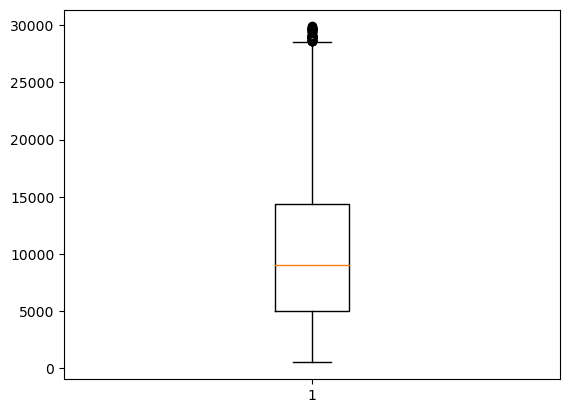

In [78]:
plt.boxplot(loan_data.loan_amnt)
plt.show()

From the above graph, we can see the the loan_amnt is spread widely from 50th percentile to 100th percentile.

In [79]:
loan_data.loan_amnt.describe()

count    34295.000000
mean     10273.626622
std       6276.333232
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      29900.000000
Name: loan_amnt, dtype: float64

Let us now analyse "int_rate".

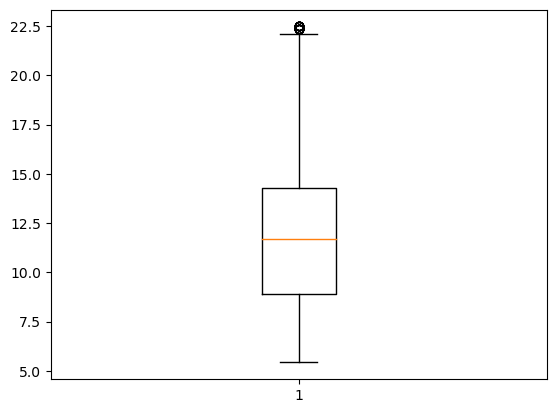

In [80]:
plt.boxplot(loan_data.int_rate)
plt.show()

From the above graph, we can see the the int_rate is spread widely from 50th percentile to 100th percentile. Let us describe it.

In [81]:
loan_data.int_rate.describe()

count    34295.000000
mean        11.836186
std          3.603375
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         22.480000
Name: int_rate, dtype: float64

The average int_rate given to the applicants is 11.83%

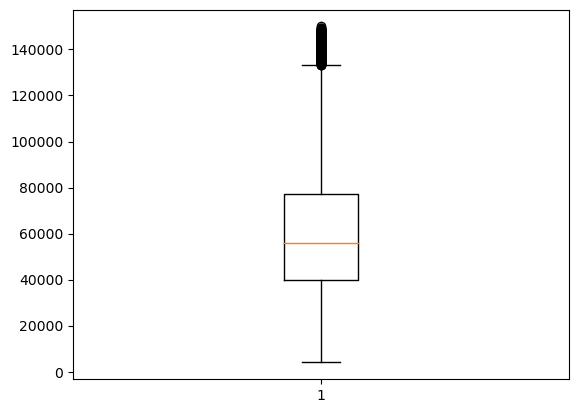

In [82]:
plt.boxplot(loan_data.annual_inc)
plt.show()

From the above graph, we can see the the annual_inc is spread widely from 50th percentile to 100th percentile. Let us describe it.

In [83]:
loan_data.annual_inc.describe()

count     34295.000000
mean      61186.056529
std       27911.822309
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77290.000000
max      149981.000000
Name: annual_inc, dtype: float64

Segmented univariate analysis

Let us check how int_rate is distributed on "purpose"

In [84]:
loan_data.groupby(by="purpose")["int_rate"].mean()

purpose
car                   10.532950
credit_card           11.543101
debt_consolidation    12.251379
educational           11.770351
home_improvement      11.086742
house                 12.205016
major_purchase        10.770062
medical               11.520948
moving                11.534477
other                 11.680379
renewable_energy      11.221529
small_business        12.849563
vacation              10.874277
wedding               11.757153
Name: int_rate, dtype: float64

As we can see, interest rate is high for purposes of debt_consolidation,house,small_business and low for car,vacation,major_purchase.

Let us check how loan_amnt is distributed on "purpose".

In [85]:
loan_data.groupby(by="purpose")["loan_amnt"].mean()

purpose
car                    6683.039568
credit_card           10938.305914
debt_consolidation    11677.046197
educational            6594.473684
home_improvement       9894.266247
house                 11158.576052
major_purchase         7578.431877
medical                7641.094771
moving                 6031.734496
other                  7455.998532
renewable_energy       7941.764706
small_business        11739.439508
vacation               5410.466867
wedding                9377.275379
Name: loan_amnt, dtype: float64

As we can see, loan_amnt is high for purposes of debt_consolidation,house,small_business.